<a href="https://colab.research.google.com/github/ashish-v43/unemployment-and-skill-gap-analysis/blob/main/plfs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/PLFS_Project/data_raw/"

ur = pd.read_csv(path + "ur_state.csv")
lfpr = pd.read_csv(path + "lfpr_state.csv")
wpr = pd.read_csv(path + "wpr_state.csv")
edu = pd.read_csv(path + "education_unemployment.csv")

ur.head(), lfpr.head(), wpr.head(), edu.head()


(  Country                        State                                Year  \
 0   India  Andaman and Nicobar Islands  Agriculture Year (Jul - Jun), 2023   
 1   India  Andaman and Nicobar Islands  Agriculture Year (Jul - Jun), 2023   
 2   India  Andaman and Nicobar Islands  Agriculture Year (Jul - Jun), 2023   
 3   India  Andaman and Nicobar Islands  Agriculture Year (Jul - Jun), 2023   
 4   India  Andaman and Nicobar Islands  Agriculture Year (Jul - Jun), 2023   
 
   Age Group Type Of Area  Gender  \
 0     15-29        Rural    Male   
 1     15-29        Rural  Female   
 2     15-29        Rural  Person   
 3     15-29        Urban    Male   
 4     15-29        Urban  Female   
 
    Unemployment Rate (Ur) (UOM:%(Percentage)), Scaling Factor:1  
 0                                               28.1             
 1                                               51.8             
 2                                               38.2             
 3                              

In [ ]:
ur.columns, lfpr.columns, wpr.columns, edu.columns



(Index(['Country', 'State', 'Year', 'Age Group', 'Type Of Area', 'Gender',
        'Unemployment Rate (Ur) (UOM:%(Percentage)), Scaling Factor:1'],
       dtype='object'),
 Index(['Country', 'State', 'Year', 'Gender', 'Age Group', 'Type Of Area',
        'Labour Force Participation Rate (Lfpr) (UOM:%(Percentage)), Scaling Factor:1'],
       dtype='object'),
 Index(['Country', 'State', 'Year', 'Gender', 'Age Group', 'Type Of Area',
        'Worker Population Ratio (Wpr) (UOM:%(Percentage)), Scaling Factor:1'],
       dtype='object'),
 Index(['Country', 'State', 'Year', 'Type Of Areas', 'Gender',
        'Education Level',
        'Labor Force Participation Rate According To Usual Status Based On Different General Education Level (UOM:%(Percentage)), Scaling Factor:1',
        'Working Population Rate According To Usual Status Based On Different General Education Level (UOM:%(Percentage)), Scaling Factor:1',
        'Unemployment Rate According To Usual Status Based On Different General 

In [ ]:
ur_clean = ur.copy()

ur_clean = ur_clean[
    ur_clean['Type Of Area'].str.lower().str.contains('total|urban', na=False)
]

ur_clean = ur_clean.groupby('State', as_index=False)[
    'Unemployment Rate (Ur) (UOM:%(Percentage)), Scaling Factor:1'
].mean()

ur_clean.columns = ['State', 'UR']


In [ ]:
lfpr_clean = lfpr.copy()

lfpr_clean = lfpr_clean[
    lfpr_clean['Type Of Area'].str.lower().str.contains('total|urban', na=False)
]

lfpr_clean = lfpr_clean.groupby('State', as_index=False)[
    'Labour Force Participation Rate (Lfpr) (UOM:%(Percentage)), Scaling Factor:1'
].mean()

lfpr_clean.columns = ['State', 'LFPR']


In [ ]:
wpr_clean = wpr.copy()

wpr_clean = wpr_clean[
    wpr_clean['Type Of Area'].str.lower().str.contains('total|urban', na=False)
]

wpr_clean = wpr_clean.groupby('State', as_index=False)[
    'Worker Population Ratio (Wpr) (UOM:%(Percentage)), Scaling Factor:1'
].mean()

wpr_clean.columns = ['State', 'WPR']


In [ ]:
df = ur_clean.merge(lfpr_clean, on='State', how='inner') \
             .merge(wpr_clean, on='State', how='inner')

df.shape, df.head()


((36, 4),
                          State         UR       LFPR        WPR
 0  Andaman and Nicobar Islands  19.900595  58.055357  48.277381
 1               Andhra Pradesh   9.287500  51.538690  47.169643
 2            Arunachal Pradesh  15.939881  42.110119  36.814286
 3                        Assam  11.952976  45.569643  41.072619
 4                        Bihar  11.301786  34.788095  31.240476)

In [ ]:
if df.empty:
    print("❌ DataFrame is empty – cannot plot")
else:
    print("✅ DataFrame ready for plotting")


✅ DataFrame ready for plotting


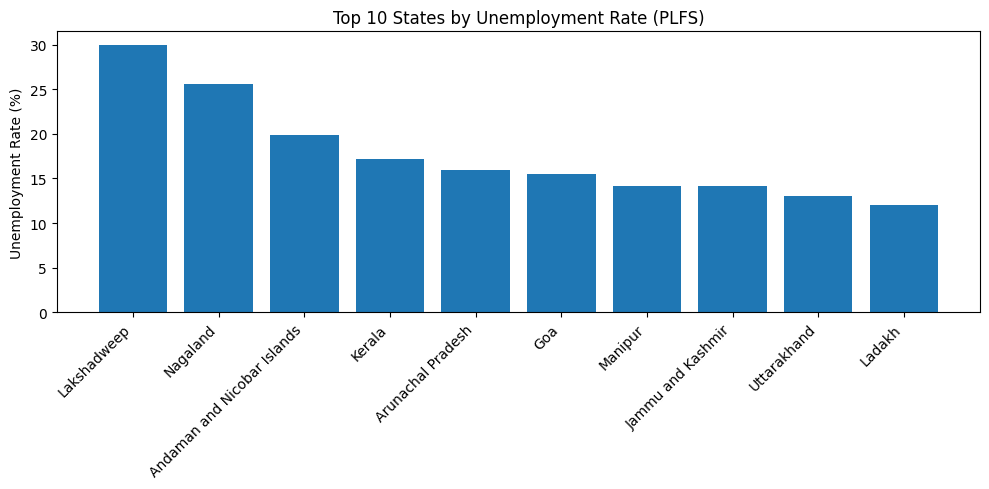

In [ ]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values('UR', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(df_sorted['State'], df_sorted['UR'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Unemployment Rate (%)')
plt.title('Top 10 States by Unemployment Rate (PLFS)')
plt.tight_layout()
plt.show()


In [ ]:
df.describe()


,UR,LFPR,WPR
count,36.000000,36.000000,36.000000
mean,11.318082,47.884200,43.195959
std,5.391439,5.049123,5.381941
min,3.963095,34.788095,31.240476
25%,8.558780,44.818452,40.198065
50%,10.511012,48.330357,42.343452
75%,12.289435,49.941964,46.412946
max,29.988095,58.575000,55.130952


In [ ]:
df.sort_values('UR', ascending=False).head(5)


,State,UR,LFPR,WPR
17,Lakshadweep,29.988095,44.405357,33.063095
23,Nagaland,25.588690,48.698214,37.881548
0,Andaman and Nicobar Islands,19.900595,58.055357,48.277381
15,Kerala,17.176786,47.674405,40.761905
2,Arunachal Pradesh,15.939881,42.110119,36.814286


In [ ]:
### Key Finding 1: High Unemployment States
#States/UT such as Lakshadweep and nagaland show unemployment rates significantly above the national average, indicating structural labour market challenges.


In [ ]:
aishe = pd.read_csv(path + "aishe_enrolment_state.csv")
aishe.head()

,Country,State,Year,Gender,Level Of Education,"Estimated Enrolment At Various Levels (UOM:Number), Scaling Factor:1"
0,India,Andaman And Nicobar Islands,"Financial Year (Apr - Mar), 2021",Female,Certificate,33.0
1,India,Andaman And Nicobar Islands,"Financial Year (Apr - Mar), 2021",Female,Diploma,407.0
2,India,Andaman And Nicobar Islands,"Financial Year (Apr - Mar), 2021",Female,Integrated,355.0
3,India,Andaman And Nicobar Islands,"Financial Year (Apr - Mar), 2021",Female,M.Phil.,NaN
4,India,Andaman And Nicobar Islands,"Financial Year (Apr - Mar), 2021",Female,PG Diploma,37.0


In [ ]:
aishe = aishe[[
    'State',
    'Gender',
    'Level Of Education',
    'Estimated Enrolment At Various Levels (UOM:Number), Scaling Factor:1'
]]

In [ ]:
aishe.columns = ['State', 'Gender', 'Education_Level', 'Enrolment']


In [ ]:
aishe['Enrolment'] = pd.to_numeric(aishe['Enrolment'], errors='coerce')


In [ ]:
relevant_levels = [
    'Diploma', 'PG Diploma', 'Under Graduate',
    'Integrated', 'Post Graduate', 'M.Phil.', 'PhD'
]

aishe = aishe[aishe['Education_Level'].isin(relevant_levels)]


In [ ]:
aishe['Enrolment'] = aishe['Enrolment'].fillna(0)


In [ ]:
aishe_state = (
    aishe
    .groupby('State', as_index=False)['Enrolment']
    .sum()
)

aishe_state.rename(columns={'Enrolment': 'Graduate_Supply'}, inplace=True)
aishe_state.head()


,State,Graduate_Supply
0,Andaman And Nicobar Islands,1.119180e+05
1,Andhra Pradesh,1.978578e+07
2,Arunachal Pradesh,5.281790e+05
3,Assam,6.713117e+06
4,Bihar,1.847632e+07


In [ ]:
aishe_state['State'] = aishe_state['State'].str.strip().str.title()


In [ ]:
final_df = df.merge(
    aishe_state,
    on='State',
    how='left'
)

final_df.head(36)


,State,UR,LFPR,WPR,Graduate_Supply
0,Andaman and Nicobar Islands,19.900595,58.055357,48.277381,NaN
1,Andhra Pradesh,9.287500,51.538690,47.169643,1.978578e+07
2,Arunachal Pradesh,15.939881,42.110119,36.814286,5.281790e+05
3,Assam,11.952976,45.569643,41.072619,6.713117e+06
4,Bihar,11.301786,34.788095,31.240476,1.847632e+07
5,Chandigarh,9.127381,44.994048,41.219643,1.047999e+06
6,Chhattisgarh,7.543452,54.588095,50.919643,5.555319e+06
7,Delhi,8.735714,41.347024,37.889881,1.093402e+07
8,Goa,15.496429,48.687500,41.914881,5.641720e+05
9,Gujarat,3.963095,49.592857,47.715476,1.612744e+07


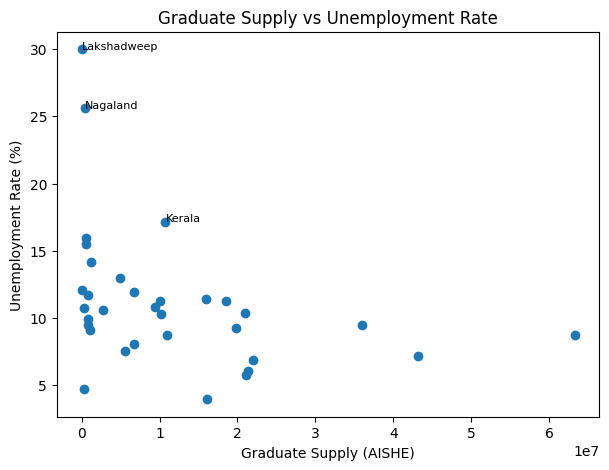

In [ ]:
final_df.shape
final_df.isna().sum()
final_df[final_df['Graduate_Supply'].isna()][['State']]
final_df[['UR', 'LFPR', 'WPR', 'Graduate_Supply']].describe()
(final_df['WPR'] <= final_df['LFPR']).all()
final_df['State'].duplicated().sum()
#plot checking
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(final_df['Graduate_Supply'], final_df['UR'])

for _, row in final_df.iterrows():
    if row['UR'] > final_df['UR'].quantile(0.9):
        plt.text(row['Graduate_Supply'], row['UR'], row['State'], fontsize=8)

plt.xlabel('Graduate Supply (AISHE)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Graduate Supply vs Unemployment Rate')
plt.show()
#correlation
final_df[['Graduate_Supply', 'UR']].corr()
assert not final_df.empty, "Final dataset is empty!"








In [ ]:
#insights
final_df.sort_values('Graduate_Supply', ascending=False).head(10)


,State,UR,LFPR,WPR,Graduate_Supply
33,Uttar Pradesh,8.726190,41.276786,37.957738,6.324256e+07
19,Maharashtra,7.166071,48.605357,45.422619,4.314764e+07
29,Tamil Nadu,9.497024,50.802976,46.403571,3.595527e+07
14,Karnataka,6.842857,48.277976,45.293452,2.198856e+07
35,West Bengal,6.036905,49.398214,46.441071,2.136118e+07
18,Madhya Pradesh,5.776190,49.442857,46.813095,2.106790e+07
27,Rajasthan,10.404762,46.495833,42.151786,2.099615e+07
1,Andhra Pradesh,9.287500,51.538690,47.169643,1.978578e+07
4,Bihar,11.301786,34.788095,31.240476,1.847632e+07
9,Gujarat,3.963095,49.592857,47.715476,1.612744e+07


In [ ]:
final_df.sort_values('UR', ascending=False).head(10)


,State,UR,LFPR,WPR,Graduate_Supply
17,Lakshadweep,29.988095,44.405357,33.063095,5.500000e+03
23,Nagaland,25.588690,48.698214,37.881548,4.838660e+05
0,Andaman and Nicobar Islands,19.900595,58.055357,48.277381,NaN
15,Kerala,17.176786,47.674405,40.761905,1.075630e+07
2,Arunachal Pradesh,15.939881,42.110119,36.814286,5.281790e+05
8,Goa,15.496429,48.687500,41.914881,5.641720e+05
20,Manipur,14.153571,42.361310,37.155357,1.211663e+06
12,Jammu and Kashmir,14.147024,49.415476,43.625000,NaN
34,Uttarakhand,12.988095,44.025000,39.229762,4.997877e+06
16,Ladakh,12.056548,50.132143,45.296429,7.391650e+04


In [ ]:
final_df.sort_values('Graduate_Supply').head(10)


,State,UR,LFPR,WPR,Graduate_Supply
17,Lakshadweep,29.988095,44.405357,33.063095,5500.000000
16,Ladakh,12.056548,50.132143,45.296429,73916.497728
28,Sikkim,4.750000,57.488690,55.130952,359904.000000
22,Mizoram,10.712500,44.552381,40.520833,360382.000000
23,Nagaland,25.588690,48.698214,37.881548,483866.000000
2,Arunachal Pradesh,15.939881,42.110119,36.814286,528179.000000
8,Goa,15.496429,48.687500,41.914881,564172.000000
25,Puducherry,11.735714,46.944643,41.995238,796446.000000
21,Meghalaya,9.922619,49.904167,45.658929,859330.000000
32,Tripura,9.464881,45.501786,42.178571,869832.000000


In [ ]:
final_df['LFPR_WPR_Gap'] = final_df['LFPR'] - final_df['WPR']
final_df.sort_values('LFPR_WPR_Gap', ascending=False).head(5)


,State,UR,LFPR,WPR,Graduate_Supply,LFPR_WPR_Gap
17,Lakshadweep,29.988095,44.405357,33.063095,5500.0,11.342262
23,Nagaland,25.588690,48.698214,37.881548,483866.0,10.816667
0,Andaman and Nicobar Islands,19.900595,58.055357,48.277381,NaN,9.777976
15,Kerala,17.176786,47.674405,40.761905,10756300.0,6.912500
8,Goa,15.496429,48.687500,41.914881,564172.0,6.772619


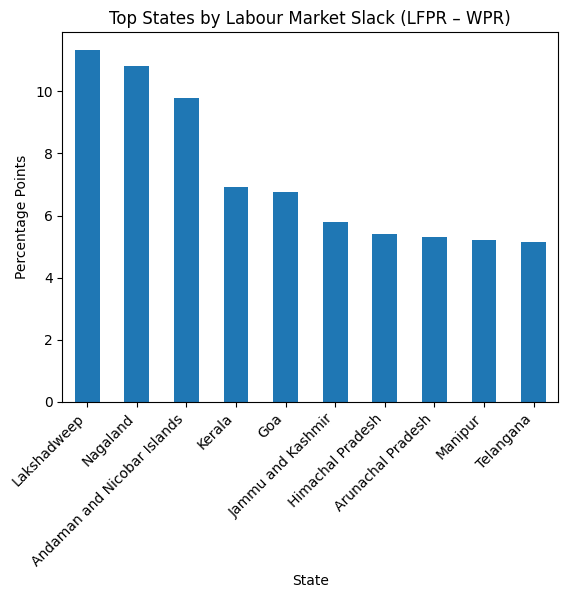

In [ ]:
final_df.sort_values('LFPR_WPR_Gap', ascending=False).head(10).plot(
    x='State', y='LFPR_WPR_Gap', kind='bar', legend=False
)

plt.title('Top States by Labour Market Slack (LFPR – WPR)')
plt.ylabel('Percentage Points')
plt.xticks(rotation=45, ha='right')
plt.show()
